# The Perceptron
When it comes to Machine Learning and creating intelligent algorithms, the brain has been selected as source of inspiration to create something that assimilates intelligence. This inspiration led to the development of _Artificial Neural Networks_ (ANN's). As it's name implies ANN's are built in similitude to networks of biological neurons found in our brains. 

The Perceptron is one of the simplest ANN architectures and was invented in 1957 by Frank Rosenblatt. 

## Perceptron Model

The perceptron model is defined by the following function:

$$
f(x) = \text{activation}\left(\sum_{i=1}^n w_i \cdot x_i + b\right)
$$

where:
- $x = [x_1, x_2, ..., x_n]$ is the input feature vector.
- $w = [w_1, w_2, ..., w_n]$ is the weight vector.
- $b$ is the bias.
- The activation function is typically a step function that outputs 1 if the input is above a certain threshold and 0 otherwise.

In our application, we will use the `Perceptron` class from `scikit-learn`, which implements a linear model with the Heaviside step function as the activation function.

The Perceptron Model can be summarized as follows: 

![Perceptron Model](Perceptron_Model.png)  
Image source: https://www.nomidl.com/deep-learning/what-is-perceptron/


## Sonar, Mines vs. Rocks Dataset with Perceptron

This notebook demonstrates the use of a perceptron, a simple linear classifier, on the Sonar, Mines vs. Rocks dataset. The goal is to classify sonar signals as either bounced off a metal cylinder ('mine') or a rock ('rock').


In [3]:
# Make sure to install necessary libraries
!pip install numpy pandas scikit-learn matplotlib

#### Load the Dataset

The Sonar dataset is loaded from the UCI Machine Learning Repository. It contains 208 instances, each with 60 attributes (sonar returns) and a label ('R' for rock, 'M' for mine).

In [4]:
import pandas as pd

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url, header=None)

# Display the first few rows of the dataframe
df.head(208)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


#### Preprocess the Data

The labels in the dataset are strings ('R' and 'M'), which we need to convert to integers to use in our model.


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
encoder = LabelEncoder()

# Encode labels in column 60
df[60] = encoder.fit_transform(df[60])

# Show transformed labels
df[60].head()

0    1
1    1
2    1
3    1
4    1
Name: 60, dtype: int32

#### Split the Dataset

To evaluate the performance of our perceptron, we will split the data into a training set and a testing set.


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(60, axis=1)  # Features
y = df[60]               # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train the Perceptron

We will now create and train the perceptron model using the training data.

In [7]:
from sklearn.linear_model import Perceptron

# Initialize the Perceptron
perceptron = Perceptron()

# Train the Perceptron
perceptron.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = perceptron.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.88


In [10]:
#Let's now check the weight and bias of the model
print(perceptron.coef_)
print(perceptron.intercept_)


[[ -2.1956  -1.833   -0.4439  -4.3435  -3.6708   0.4764   2.0441  -0.6229
   -5.7732  -5.5432 -11.8137  -7.2163   0.1479   4.3643   3.2166   2.8292
    0.3517   1.5213  -2.2449  -1.6784  -1.7726  -2.2142  -2.3634  -3.7475
    2.4258   4.0695   0.7735  -1.2252   1.3315  -1.934    9.3901  -4.559
   -3.6296   3.4539   1.575    3.4929   5.1179  -0.4393  -2.2928   3.2484
    0.8233  -1.3895  -7.3365  -8.0052 -10.4313  -9.0178  -3.6044  -4.268
   -3.988   -0.1723  -1.0471  -1.009   -0.3342  -0.7284  -0.263   -0.1016
    0.0524  -0.559   -0.6268  -0.217 ]]
[8.]


#### Evaluate the Model

We use a confusion matrix and a classification report to evaluate the performance of our model on the test set.


In [8]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred = perceptron.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[24  2]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        26
           1       0.87      0.81      0.84        16

    accuracy                           0.88        42
   macro avg       0.88      0.87      0.87        42
weighted avg       0.88      0.88      0.88        42



We can see that our model had great precision with average 88% accuracy and a f1-score of 88%!

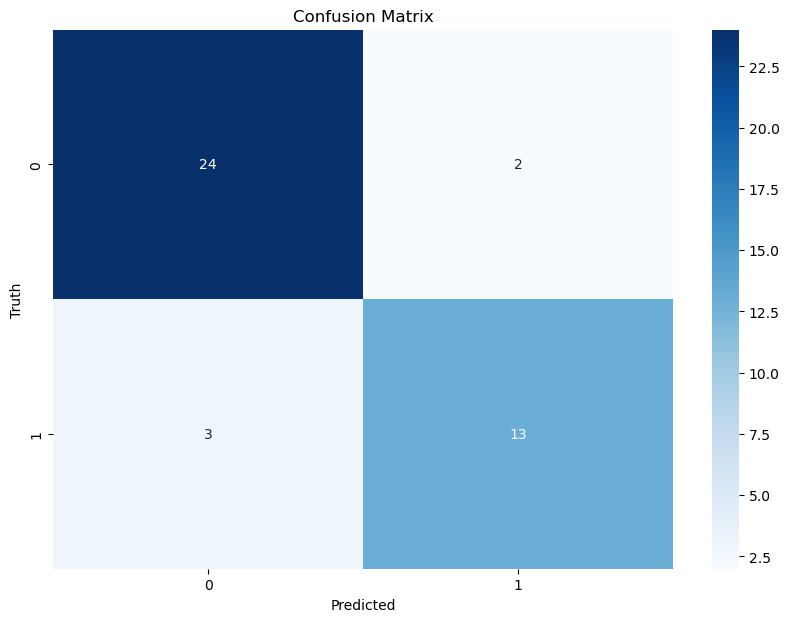

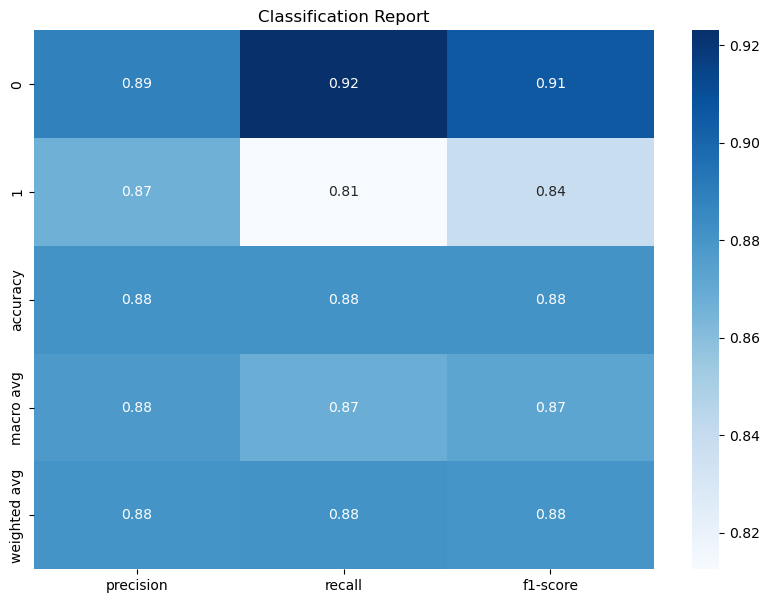

In [9]:
#Let's plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")
plt.show()

# Plot the classification report
plt.figure(figsize=(10, 7))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).iloc[:-1, :].T, annot=True, cmap="Blues")
plt.title("Classification Report")
plt.show()


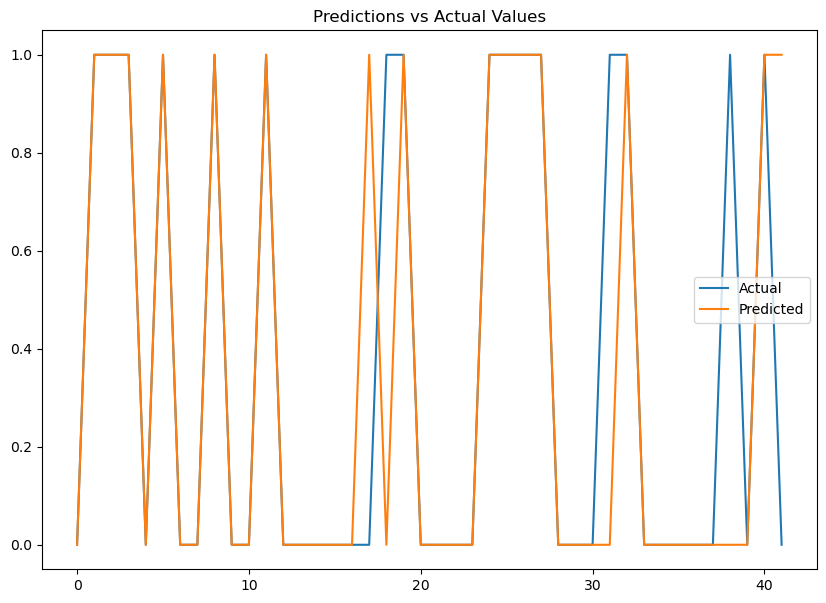

In [12]:
#Let's plot the predictions vs actual values
plt.figure(figsize=(10, 7))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Predictions vs Actual Values")
plt.legend()
plt.show()

It is important to note that the Perceptron is useful for data that is linearly separable. Otherwise the model will not perform correctly. Perceptron can be used for data non linearly separable but that would be in a Neural Network. Check the [Neural Networks](./Neural_Networks) notebook for further info and learning.